Autoencoder - encode images for similarity analysis

In [2]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import regularizers

In [60]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

encoder = Model(input_img, encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [61]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [73]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder/run1')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 27s 457us/step - loss: 0.1154 - val_loss: 0.1126
Epoch 2/50
60000/60000 [==============================] - 27s 455us/step - loss: 0.1141 - val_loss: 0.1110
Epoch 3/50
60000/60000 [==============================] - 27s 456us/step - loss: 0.1131 - val_loss: 0.1106
Epoch 4/50
60000/60000 [==============================] - 27s 456us/step - loss: 0.1120 - val_loss: 0.1100
Epoch 5/50
60000/60000 [==============================] - 28s 460us/step - loss: 0.1113 - val_loss: 0.1090
Epoch 6/50
60000/60000 [==============================] - 27s 458us/step - loss: 0.1105 - val_loss: 0.1087
Epoch 7/50
60000/60000 [==============================] - 28s 462us/step - loss: 0.1099 - val_loss: 0.1077
Epoch 8/50
60000/60000 [==============================] - 27s 458us/step - loss: 0.1091 - val_loss: 0.1057
Epoch 9/50
60000/60000 [==============================] - 27s 455us/step - loss: 0.1085 - val_

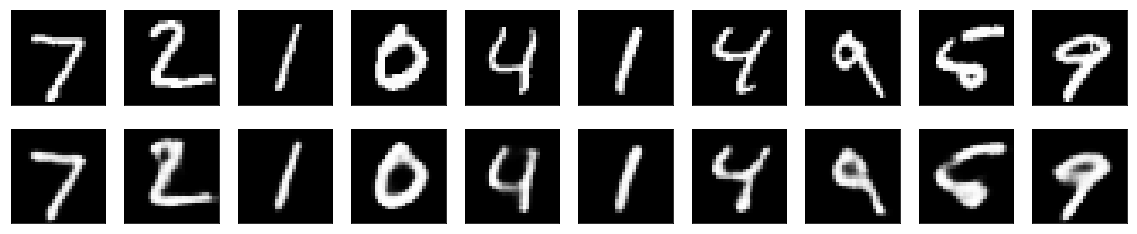

In [74]:
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [75]:
from sklearn.cluster import KMeans

In [109]:
imgs = x_train # encoder.predict(x_train)

In [116]:
shape = imgs.shape
x_shape = shape[0]
y_shape = shape[1] * shape[2] * shape[3]

In [117]:
kmeans = KMeans().fit(imgs.reshape(x_shape, y_shape,))

In [118]:
clusters = kmeans.predict(imgs.reshape(x_shape, y_shape,))

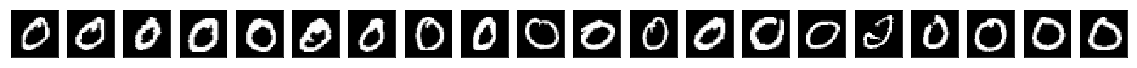

In [119]:
k = 3
n = 20
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[clusters == k][i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [120]:
num_clusters = len(np.unique(clusters))
for k in range(num_clusters):
    group = clusters[clusters == k]
    print(str(k) + ": " + str(len(group)))

0: 5828
1: 10849
2: 7223
3: 5032
4: 8972
5: 4861
6: 8002
7: 9233


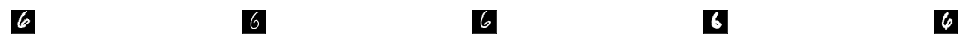

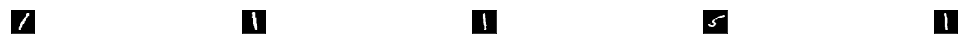

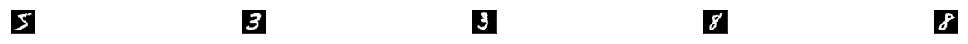

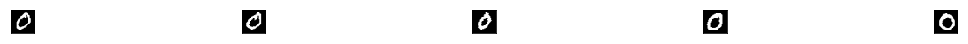

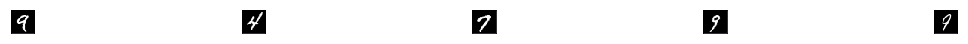

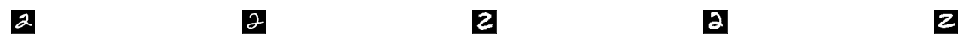

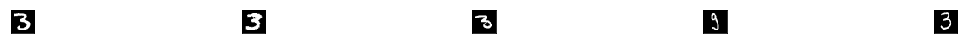

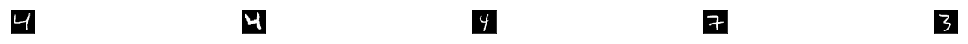

In [121]:
n = 5
for k in range(num_clusters):
    group = x_train[clusters == k]
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(num_clusters, n, i + k*n + 1)
        plt.imshow(group[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
plt.show()